# Boosting Models

## Drill: Improve this gradient boost model


by: Melissa N 

In [1]:
import pandas as pd
import numpy as np
import scipy
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn import ensemble
from sklearn import datasets
from sklearn.utils import shuffle
from sklearn.metrics import mean_squared_error

from IPython.display import Image
from IPython.display import display
import seaborn as sns

from sklearn.metrics import classification_report,confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict

In [2]:
df = pd.read_csv((
    "https://raw.githubusercontent.com/Thinkful-Ed/data-201-resources/"
    "master/ESS_practice_data/ESSdata_Thinkful.csv")).dropna()

# Definine outcome and predictors.
# Set our outcome to 0 and 1.
y = df['partner'] - 1
X = df.loc[:, ~df.columns.isin(['partner', 'cntry', 'idno'])]

# Make the categorical variable 'country' into dummies.
X = pd.concat([X, pd.get_dummies(df['cntry'])], axis=1)

# Create training and test sets.
offset = int(X.shape[0] * 0.9)

# Put 90% of the data in the training set.
X_train, y_train = X[:offset], y[:offset]

# And put 10% in the test set.
X_test, y_test = X[offset:], y[offset:]

In [3]:
display(X.head())

,year,tvtot,ppltrst,pplfair,pplhlp,happy,sclmeet,sclact,gndr,agea,CH,CZ,DE,ES,NO,SE
0,6,3.0,3.0,10.0,5.0,8.0,5.0,4.0,2.0,60.0,1,0,0,0,0,0
1,6,6.0,5.0,7.0,5.0,9.0,3.0,2.0,2.0,59.0,1,0,0,0,0,0
2,6,1.0,8.0,8.0,8.0,7.0,6.0,3.0,1.0,24.0,1,0,0,0,0,0
3,6,4.0,6.0,6.0,7.0,10.0,6.0,2.0,2.0,64.0,1,0,0,0,0,0
4,6,5.0,6.0,7.0,5.0,8.0,7.0,2.0,2.0,55.0,1,0,0,0,0,0


In [4]:
X.columns

Index(['year', 'tvtot', 'ppltrst', 'pplfair', 'pplhlp', 'happy', 'sclmeet',
       'sclact', 'gndr', 'agea', 'CH', 'CZ', 'DE', 'ES', 'NO', 'SE'],
      dtype='object')

In [5]:
display(y.head())

0    0.0
1    0.0
2    1.0
3    0.0
4    0.0
Name: partner, dtype: float64

## Initial Classifier 

In [6]:
# We'll make 500 iterations, use 2-deep trees, and set our loss function.
params = {'n_estimators': 500,
          'max_depth': 2,
          'loss': 'deviance'}

# Initialize and fit the model.
clf = ensemble.GradientBoostingClassifier(**params)
clf.fit(X, y)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=2,
              max_features=None, max_leaf_nodes=None,
              min_impurity_split=1e-07, min_samples_leaf=1,
              min_samples_split=2, min_weight_fraction_leaf=0.0,
              n_estimators=500, presort='auto', random_state=None,
              subsample=1.0, verbose=0, warm_start=False)

In [7]:
target = y
data = X
y_pred = clf.predict(data)
score = clf.score(data, target) 
cross_val = cross_val_score(clf, data, target, cv=5)

In [8]:
print("Number of mislabeled points out of a total {} points : {}".format(data.shape[0], (target != y_pred).sum()))

cm = confusion_matrix(target, y_pred)

df_cm = pd.DataFrame(cm, index=['Actual False', 'Actual True'], columns=['Predict False', 'Predict True']) 

display(df_cm)

t_pos = df_cm.iloc[1,1]
t_neg = df_cm.iloc[0,0] 
f_pos = df_cm.iloc[0,1] 
f_neg = df_cm.iloc[1,0]

a_pos = (target == True).sum() 
a_neg = (target == False).sum() 
p_pos = (y_pred == True).sum() 
p_neg = (y_pred == False).sum() 
tot = data.shape[0]

print("False Positives (Type I error): {} ({:.1%})\nFalse Negatives (Type II error): {} ({:.1%})".format(f_pos,f_pos / a_neg,f_neg,f_neg / a_pos))
plusminus = u"\u00B1"
print('\nScore on training set: {:.3%}'.format(score)) 
print('\nCross validation results: {:.3%} {} {:.3%} \n \n {}'.format(cross_val.mean(), plusminus, cross_val.std(), cross_val))


Number of mislabeled points out of a total 8147 points : 1844


,Predict False,Predict True
Actual False,4614,399
Actual True,1445,1689


False Positives (Type I error): 399 (8.0%)
False Negatives (Type II error): 1445 (46.1%)

Score on training set: 77.366%

Cross validation results: 74.481% ± 1.959% 
 
 [ 0.76932515  0.71595092  0.76380368  0.74033149  0.73464373]


There is a lot of Type II error.    
There is a lot of the terms that were True but were predicted False. 

This seems to be predicting similarly on the Test set and Training set.  
There doesn't seem to be any overfitting.   


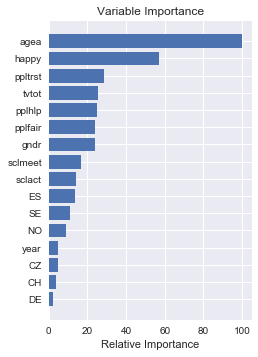

In [9]:
feature_importance = clf.feature_importances_

# Make importances relative to max importance.
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
plt.subplot(1, 2, 2)
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, X.columns[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()

 Your task is to see how low you can get the error rates to go in the test set, based on your model in the training set. Strategies you might use include:   

Creating new features   
Applying more overfitting-prevention strategies like subsampling  
More iterations   
Trying a different loss function   
Changing the structure of the weak learner: Allowing more leaves in the tree, or other modifications   

### Creating / Removing Features

In [10]:
df.columns

Index(['cntry', 'idno', 'year', 'tvtot', 'ppltrst', 'pplfair', 'pplhlp',
       'happy', 'sclmeet', 'sclact', 'gndr', 'agea', 'partner'],
      dtype='object')

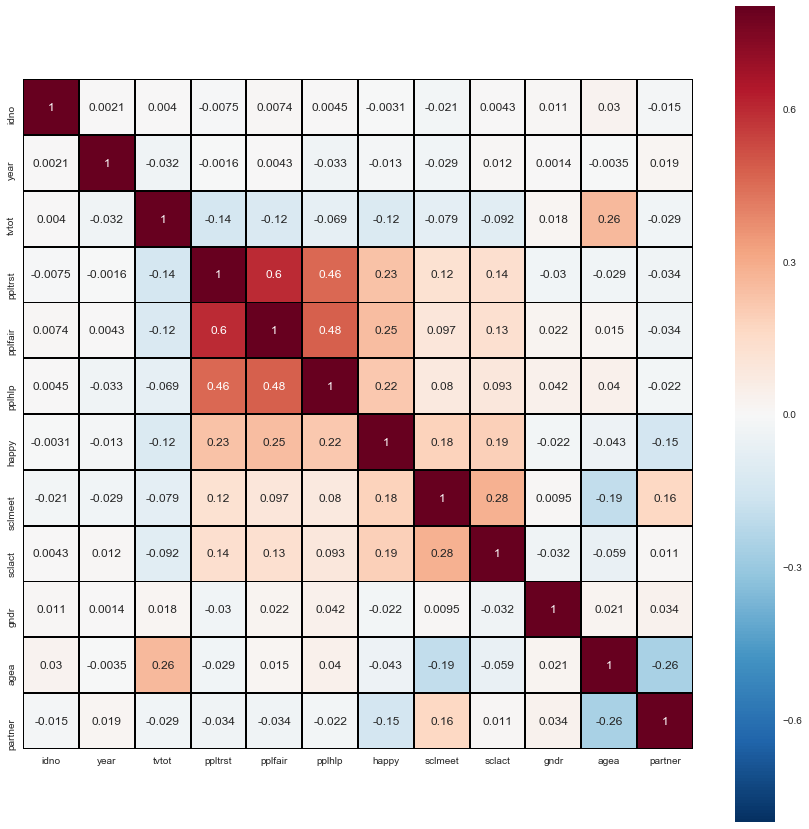

In [11]:
plt.figure(figsize=(15, 15))
sns.heatmap(df.corr(),vmax=.8, square=True, linecolor='black', linewidths=1, annot=True)
plt.show()

From this correlation matrix,   
We see that only __sclmeet__ has a strong correlation with partner 0.16

Also we can note that __idno__, __year__ and __tvtot__ are some of the features that could be remove since the have no strong correlation with our outcome __partner__

In [12]:
df_f = df[['cntry', 'ppltrst', 'pplfair', 'pplhlp',
       'happy', 'sclmeet', 'sclact', 'gndr','agea', 'partner']]

In [13]:
# Definine outcome and predictors.
# Set our outcome to 0 and 1.
y = df_f['partner'] - 1
X = df_f.loc[:, ~df_f.columns.isin(['partner', 'cntry'])]

# Make the categorical variable 'country' into dummies.
X = pd.concat([X, pd.get_dummies(df['cntry'])], axis=1)


In [14]:
# We'll make 500 iterations, use 2-deep trees, and set our loss function.
params = {'n_estimators': 500,
          'max_depth': 2,
          'loss': 'deviance'}

# Initialize and fit the model.
clf = ensemble.GradientBoostingClassifier(**params)
clf.fit(X, y)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=2,
              max_features=None, max_leaf_nodes=None,
              min_impurity_split=1e-07, min_samples_leaf=1,
              min_samples_split=2, min_weight_fraction_leaf=0.0,
              n_estimators=500, presort='auto', random_state=None,
              subsample=1.0, verbose=0, warm_start=False)

In [15]:
target = y
data = X
y_pred = clf.predict(data)
score = clf.score(data, target) 
cross_val = cross_val_score(clf, data, target, cv=5)

In [16]:
print("Number of mislabeled points out of a total {} points : {}".format(data.shape[0], (target != y_pred).sum()))

cm = confusion_matrix(target, y_pred)

df_cm = pd.DataFrame(cm, index=['Actual False', 'Actual True'], columns=['Predict False', 'Predict True']) 

display(df_cm)

t_pos = df_cm.iloc[1,1]
t_neg = df_cm.iloc[0,0] 
f_pos = df_cm.iloc[0,1] 
f_neg = df_cm.iloc[1,0]

a_pos = (target == True).sum() 
a_neg = (target == False).sum() 
p_pos = (y_pred == True).sum() 
p_neg = (y_pred == False).sum() 
tot = data.shape[0]

print("False Positives (Type I error): {} ({:.1%})\nFalse Negatives (Type II error): {} ({:.1%})".format(f_pos,f_pos / a_neg,f_neg,f_neg / a_pos))
plusminus = u"\u00B1"
print('\nScore on training set: {:.3%}'.format(score)) 
print('\nCross validation results: {:.3%} {} {:.3%} \n \n {}'.format(cross_val.mean(), plusminus, cross_val.std(), cross_val))


Number of mislabeled points out of a total 8147 points : 1854


,Predict False,Predict True
Actual False,4614,399
Actual True,1455,1679


False Positives (Type I error): 399 (8.0%)
False Negatives (Type II error): 1455 (46.4%)

Score on training set: 77.243%

Cross validation results: 74.506% ± 2.327% 
 
 [ 0.76748466  0.70736196  0.77177914  0.737876    0.74078624]


Removing some features did not improve on the model.   
The number of Type I and Type II errors is still the same. 

## Creating New Features 

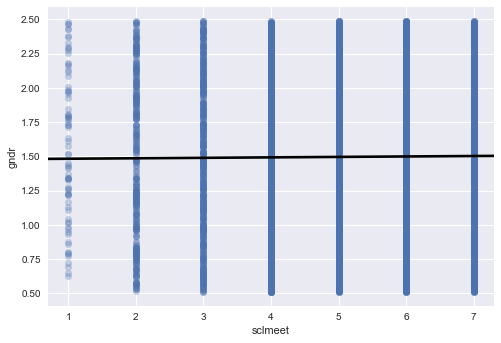

In [17]:
# Find an indicator for 'Meeting Partner.


sns.regplot(
    df['sclmeet'],
    y=df['gndr'],
    y_jitter=.49,
    order=1,
    scatter_kws={'alpha':0.3},
    line_kws={'color':'black'},
    ci=None
)
plt.show()

#df_f['meet_gender'] = df['sclmeet'] * df['gndr']

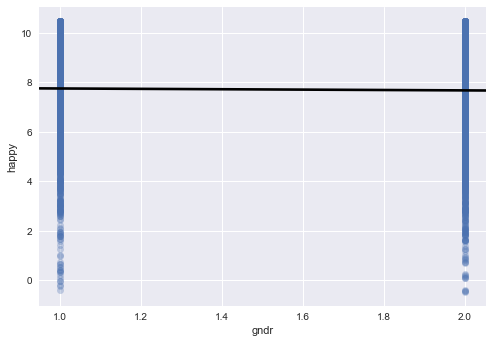

/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [18]:
# Find an indicator for 'age to have Partner.


sns.regplot(
    df['gndr'],
    y=df['happy'],
    y_jitter=.49,
    order=1,
    scatter_kws={'alpha':0.3},
    line_kws={'color':'black'},
    ci=None
)
plt.show()

df_f['gndr_happy'] = df['gndr'] / df['happy']

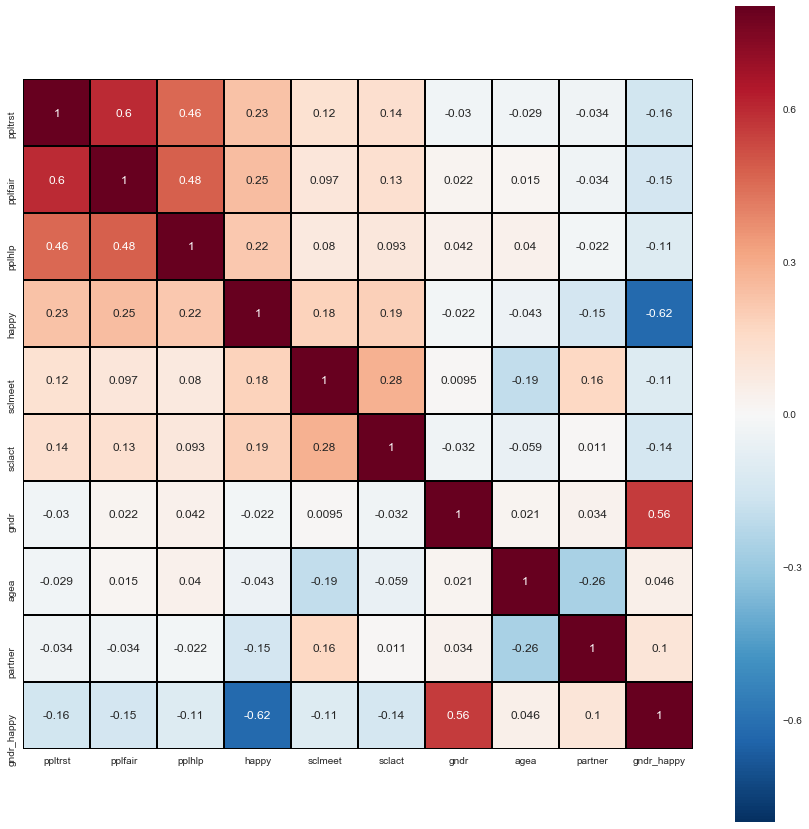

In [19]:
plt.figure(figsize=(15, 15))
sns.heatmap(df_f.corr(),vmax=.8, square=True, linecolor='black', linewidths=1, annot=True)
plt.show()

In [20]:
# Definine outcome and predictors.
# Set our outcome to 0 and 1.
y = df_f['partner'] - 1
X = df_f.loc[:, ~df_f.columns.isin(['partner', 'cntry','gndr','happy'])]
#X = X[~X.isin([np.nan, np.inf, -np.inf]).any(1)]
#X = X[X.replace([np.inf, -np.inf], np.nan).notnull().all(axis=1)]
X = X.apply(lambda x: x.replace([np.inf, -np.inf], x.median()))
#X = X.apply(lambda x: x.fillna(x.median(),inplace = True))
#X = X[~np.isnan(X).any(axis=1)]
#X = X.dropna(how ='all')

# Make the categorical variable 'country' into dummies.
X = pd.concat([X, pd.get_dummies(df['cntry'])], axis=1)


In [21]:
display(X.head())

,ppltrst,pplfair,pplhlp,sclmeet,sclact,agea,gndr_happy,CH,CZ,DE,ES,NO,SE
0,3.0,10.0,5.0,5.0,4.0,60.0,0.250000,1,0,0,0,0,0
1,5.0,7.0,5.0,3.0,2.0,59.0,0.222222,1,0,0,0,0,0
2,8.0,8.0,8.0,6.0,3.0,24.0,0.142857,1,0,0,0,0,0
3,6.0,6.0,7.0,6.0,2.0,64.0,0.200000,1,0,0,0,0,0
4,6.0,7.0,5.0,7.0,2.0,55.0,0.250000,1,0,0,0,0,0


In [22]:
# We'll make 500 iterations, use 2-deep trees, and set our loss function.
params = {'n_estimators': 500,
          'max_depth': 2,
          'loss': 'deviance'}

# Initialize and fit the model.
clf = ensemble.GradientBoostingClassifier(**params)
clf.fit(X, y)



GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=2,
              max_features=None, max_leaf_nodes=None,
              min_impurity_split=1e-07, min_samples_leaf=1,
              min_samples_split=2, min_weight_fraction_leaf=0.0,
              n_estimators=500, presort='auto', random_state=None,
              subsample=1.0, verbose=0, warm_start=False)

In [23]:
target = y
data = X
y_pred = clf.predict(data)
score = clf.score(data, target) 
cross_val = cross_val_score(clf, data, target, cv=5)

In [24]:
print("Number of mislabeled points out of a total {} points : {}".format(data.shape[0], (target != y_pred).sum()))

cm = confusion_matrix(target, y_pred)

df_cm = pd.DataFrame(cm, index=['Actual False', 'Actual True'], columns=['Predict False', 'Predict True']) 

display(df_cm)

t_pos = df_cm.iloc[1,1]
t_neg = df_cm.iloc[0,0] 
f_pos = df_cm.iloc[0,1] 
f_neg = df_cm.iloc[1,0]

a_pos = (target == True).sum() 
a_neg = (target == False).sum() 
p_pos = (y_pred == True).sum() 
p_neg = (y_pred == False).sum() 
tot = data.shape[0]

print("False Positives (Type I error): {} ({:.1%})\nFalse Negatives (Type II error): {} ({:.1%})".format(f_pos,f_pos / a_neg,f_neg,f_neg / a_pos))
plusminus = u"\u00B1"
print('\nScore on training set: {:.3%}'.format(score)) 
print('\nCross validation results: {:.3%} {} {:.3%} \n \n {}'.format(cross_val.mean(), plusminus, cross_val.std(), cross_val))


Number of mislabeled points out of a total 8147 points : 1875


,Predict False,Predict True
Actual False,4659,354
Actual True,1521,1613


False Positives (Type I error): 354 (7.1%)
False Negatives (Type II error): 1521 (48.5%)

Score on training set: 76.985%

Cross validation results: 74.076% ± 2.092% 
 
 [ 0.76319018  0.71042945  0.76564417  0.73296501  0.73157248]


The number of Type I error did go down from 399 to 354.  
The number of Type II errors went up from 1455 to 1521.

We can say that this model predict better on people who do not have partners.   

The model is not really improving but there doesn't seem to be any overfitting.  

## Hyper Parameters

### Change the max_depth to 5

In [25]:
# We'll make 500 iterations, use 5-deep trees, and set our loss function.
params = {'n_estimators': 500,
          'max_depth': 5,
          'loss': 'deviance'}

# Initialize and fit the model.
clf = ensemble.GradientBoostingClassifier(**params)
clf.fit(X, y)


GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=5,
              max_features=None, max_leaf_nodes=None,
              min_impurity_split=1e-07, min_samples_leaf=1,
              min_samples_split=2, min_weight_fraction_leaf=0.0,
              n_estimators=500, presort='auto', random_state=None,
              subsample=1.0, verbose=0, warm_start=False)

This is overfiting b/c the test set has better results than the Training set   

In [26]:
target = y
data = X
y_pred = clf.predict(data)
score = clf.score(data, target) 
cross_val = cross_val_score(clf, data, target, cv=5)

In [27]:
print("Number of mislabeled points out of a total {} points : {}".format(data.shape[0], (target != y_pred).sum()))

cm = confusion_matrix(target, y_pred)

df_cm = pd.DataFrame(cm, index=['Actual False', 'Actual True'], columns=['Predict False', 'Predict True']) 

display(df_cm)

t_pos = df_cm.iloc[1,1]
t_neg = df_cm.iloc[0,0] 
f_pos = df_cm.iloc[0,1] 
f_neg = df_cm.iloc[1,0]

a_pos = (target == True).sum() 
a_neg = (target == False).sum() 
p_pos = (y_pred == True).sum() 
p_neg = (y_pred == False).sum() 
tot = data.shape[0]

print("False Positives (Type I error): {} ({:.1%})\nFalse Negatives (Type II error): {} ({:.1%})".format(f_pos,f_pos / a_neg,f_neg,f_neg / a_pos))
plusminus = u"\u00B1"
print('\nScore on training set: {:.3%}'.format(score)) 
print('\nCross validation results: {:.3%} {} {:.3%} \n \n {}'.format(cross_val.mean(), plusminus, cross_val.std(), cross_val))


Number of mislabeled points out of a total 8147 points : 822


,Predict False,Predict True
Actual False,4919,94
Actual True,728,2406


False Positives (Type I error): 94 (1.9%)
False Negatives (Type II error): 728 (23.2%)

Score on training set: 89.910%

Cross validation results: 69.950% ± 4.687% 
 
 [ 0.75582822  0.67239264  0.72944785  0.7170043   0.62285012]


Type I error went down to 94 from 345.  
Type II error went down to 728 from 1521.  

Looking at the cross Validation result we can say that this model is definetely overfitting.  
The score on the training set and test sets are vastly different.   

### Change the loss function to exponential

In [28]:
# We'll make 500 iterations, use 2-deep trees, and set our loss function.
params = {'n_estimators': 500,
          'max_depth': 2,
          'loss': 'exponential'}

# Initialize and fit the model.
clf = ensemble.GradientBoostingClassifier(**params)
clf.fit(X, y)



GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='exponential', max_depth=2,
              max_features=None, max_leaf_nodes=None,
              min_impurity_split=1e-07, min_samples_leaf=1,
              min_samples_split=2, min_weight_fraction_leaf=0.0,
              n_estimators=500, presort='auto', random_state=None,
              subsample=1.0, verbose=0, warm_start=False)

This is overfiting b/c the test set has better results than the Training set  

In [29]:
target = y
data = X
y_pred = clf.predict(data)
score = clf.score(data, target) 
cross_val = cross_val_score(clf, data, target, cv=5)

In [30]:
print("Number of mislabeled points out of a total {} points : {}".format(data.shape[0], (target != y_pred).sum()))

cm = confusion_matrix(target, y_pred)

df_cm = pd.DataFrame(cm, index=['Actual False', 'Actual True'], columns=['Predict False', 'Predict True']) 

display(df_cm)

t_pos = df_cm.iloc[1,1]
t_neg = df_cm.iloc[0,0] 
f_pos = df_cm.iloc[0,1] 
f_neg = df_cm.iloc[1,0]

a_pos = (target == True).sum() 
a_neg = (target == False).sum() 
p_pos = (y_pred == True).sum() 
p_neg = (y_pred == False).sum() 
tot = data.shape[0]

print("False Positives (Type I error): {} ({:.1%})\nFalse Negatives (Type II error): {} ({:.1%})".format(f_pos,f_pos / a_neg,f_neg,f_neg / a_pos))
plusminus = u"\u00B1"
print('\nScore on training set: {:.3%}'.format(score)) 
print('\nCross validation results: {:.3%} {} {:.3%} \n \n {}'.format(cross_val.mean(), plusminus, cross_val.std(), cross_val))


Number of mislabeled points out of a total 8147 points : 1884


,Predict False,Predict True
Actual False,4657,356
Actual True,1528,1606


False Positives (Type I error): 356 (7.1%)
False Negatives (Type II error): 1528 (48.8%)

Score on training set: 76.875%

Cross validation results: 73.892% ± 2.239% 
 
 [ 0.76196319  0.70613497  0.76503067  0.73726212  0.72420147]


The number of Type I error did go down from 399 to 356.   
The number of Type II errors went up from 1455 to 1528.    

We can say that this model predict better on people who do not have partners.

The model is not really improving but there doesn't seem to be any overfitting.

### Change to 100 n_estimators


In [31]:
# We'll make 100 iterations, use 2-deep trees, and set our loss function.
params = {'n_estimators': 100,
          'max_depth': 2,
          'loss': 'deviance'}

# Initialize and fit the model.
clf = ensemble.GradientBoostingClassifier(**params)
clf.fit(X, y)


GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=2,
              max_features=None, max_leaf_nodes=None,
              min_impurity_split=1e-07, min_samples_leaf=1,
              min_samples_split=2, min_weight_fraction_leaf=0.0,
              n_estimators=100, presort='auto', random_state=None,
              subsample=1.0, verbose=0, warm_start=False)

This is performing about the same on the Test set as it does on the Training set.  
We can conclude that the model predicts well on itself.   

In [32]:
target = y
data = X
y_pred = clf.predict(data)
score = clf.score(data, target) 
cross_val = cross_val_score(clf, data, target, cv=5)

In [33]:
print("Number of mislabeled points out of a total {} points : {}".format(data.shape[0], (target != y_pred).sum()))

cm = confusion_matrix(target, y_pred)

df_cm = pd.DataFrame(cm, index=['Actual False', 'Actual True'], columns=['Predict False', 'Predict True']) 

display(df_cm)

t_pos = df_cm.iloc[1,1]
t_neg = df_cm.iloc[0,0] 
f_pos = df_cm.iloc[0,1] 
f_neg = df_cm.iloc[1,0]

a_pos = (target == True).sum() 
a_neg = (target == False).sum() 
p_pos = (y_pred == True).sum() 
p_neg = (y_pred == False).sum() 
tot = data.shape[0]

print("False Positives (Type I error): {} ({:.1%})\nFalse Negatives (Type II error): {} ({:.1%})".format(f_pos,f_pos / a_neg,f_neg,f_neg / a_pos))
plusminus = u"\u00B1"
print('\nScore on training set: {:.3%}'.format(score)) 
print('\nCross validation results: {:.3%} {} {:.3%} \n \n {}'.format(cross_val.mean(), plusminus, cross_val.std(), cross_val))


Number of mislabeled points out of a total 8147 points : 1975


,Predict False,Predict True
Actual False,4667,346
Actual True,1629,1505


False Positives (Type I error): 346 (6.9%)
False Negatives (Type II error): 1629 (52.0%)

Score on training set: 75.758%

Cross validation results: 74.739% ± 1.588% 
 
 [ 0.76257669  0.73190184  0.76871166  0.72928177  0.74447174]


The number of Type I error did go down from 399 to 346.   
The number of Type II errors went up from 1455 to 1629.   


The model is overfitting less when we have less estimators.       
This is possibly a better model but the prediction are worse on itself.    

### Change Sumbsample to 0.8

In [34]:
# We'll make 100 iterations, use 2-deep trees, and set our loss function.
params = {'n_estimators': 500,
          'max_depth': 2,
          'loss': 'deviance',
          'subsample': 0.8}

# Initialize and fit the model.
clf = ensemble.GradientBoostingClassifier(**params)
clf.fit(X, y)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=2,
              max_features=None, max_leaf_nodes=None,
              min_impurity_split=1e-07, min_samples_leaf=1,
              min_samples_split=2, min_weight_fraction_leaf=0.0,
              n_estimators=500, presort='auto', random_state=None,
              subsample=0.8, verbose=0, warm_start=False)

This is overfiting b/c the test set has better results than the Training set 

In [35]:
target = y
data = X
y_pred = clf.predict(data)
score = clf.score(data, target) 
cross_val = cross_val_score(clf, data, target, cv=5)

In [36]:
print("Number of mislabeled points out of a total {} points : {}".format(data.shape[0], (target != y_pred).sum()))

cm = confusion_matrix(target, y_pred)

df_cm = pd.DataFrame(cm, index=['Actual False', 'Actual True'], columns=['Predict False', 'Predict True']) 

display(df_cm)

t_pos = df_cm.iloc[1,1]
t_neg = df_cm.iloc[0,0] 
f_pos = df_cm.iloc[0,1] 
f_neg = df_cm.iloc[1,0]

a_pos = (target == True).sum() 
a_neg = (target == False).sum() 
p_pos = (y_pred == True).sum() 
p_neg = (y_pred == False).sum() 
tot = data.shape[0]

print("False Positives (Type I error): {} ({:.1%})\nFalse Negatives (Type II error): {} ({:.1%})".format(f_pos,f_pos / a_neg,f_neg,f_neg / a_pos))
plusminus = u"\u00B1"
print('\nScore on training set: {:.3%}'.format(score)) 
print('\nCross validation results: {:.3%} {} {:.3%} \n \n {}'.format(cross_val.mean(), plusminus, cross_val.std(), cross_val))


Number of mislabeled points out of a total 8147 points : 1847


,Predict False,Predict True
Actual False,4648,365
Actual True,1482,1652


False Positives (Type I error): 365 (7.3%)
False Negatives (Type II error): 1482 (47.3%)

Score on training set: 77.329%

Cross validation results: 74.015% ± 2.127% 
 
 [ 0.76503067  0.71165644  0.76441718  0.73357888  0.72604423]


The number of Type I error did go down from 399 to 364.   
The number of Type II errors went up just by a little from 1455 to 1482.   

We can say that this model predict better on people who do not have partners.

The model is not really improving but there doesn't seem to be any overfitting.
but it does goes faster 

### Change learning_rate to 0.005

In [38]:
# We'll make 100 iterations, use 2-deep trees, and set our loss function.
params = {'n_estimators': 500,
          'max_depth': 2,
          'loss': 'deviance',
          'learning_rate': 0.005}

# Initialize and fit the model.
clf = ensemble.GradientBoostingClassifier(**params)
clf.fit(X, y)


GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.005, loss='deviance', max_depth=2,
              max_features=None, max_leaf_nodes=None,
              min_impurity_split=1e-07, min_samples_leaf=1,
              min_samples_split=2, min_weight_fraction_leaf=0.0,
              n_estimators=500, presort='auto', random_state=None,
              subsample=1.0, verbose=0, warm_start=False)

This is overfiting b/c the test set has better results than the Training set 

In [39]:
target = y
data = X
y_pred = clf.predict(data)
score = clf.score(data, target) 
cross_val = cross_val_score(clf, data, target, cv=5)

In [40]:
print("Number of mislabeled points out of a total {} points : {}".format(data.shape[0], (target != y_pred).sum()))

cm = confusion_matrix(target, y_pred)

df_cm = pd.DataFrame(cm, index=['Actual False', 'Actual True'], columns=['Predict False', 'Predict True']) 

display(df_cm)

t_pos = df_cm.iloc[1,1]
t_neg = df_cm.iloc[0,0] 
f_pos = df_cm.iloc[0,1] 
f_neg = df_cm.iloc[1,0]

a_pos = (target == True).sum() 
a_neg = (target == False).sum() 
p_pos = (y_pred == True).sum() 
p_neg = (y_pred == False).sum() 
tot = data.shape[0]

print("False Positives (Type I error): {} ({:.1%})\nFalse Negatives (Type II error): {} ({:.1%})".format(f_pos,f_pos / a_neg,f_neg,f_neg / a_pos))
plusminus = u"\u00B1"
print('\nScore on training set: {:.3%}'.format(score)) 
print('\nCross validation results: {:.3%} {} {:.3%} \n \n {}'.format(cross_val.mean(), plusminus, cross_val.std(), cross_val))


Number of mislabeled points out of a total 8147 points : 2082


,Predict False,Predict True
Actual False,4763,250
Actual True,1832,1302


False Positives (Type I error): 250 (5.0%)
False Negatives (Type II error): 1832 (58.5%)

Score on training set: 74.445%

Cross validation results: 73.806% ± 1.419% 
 
 [ 0.76134969  0.72699387  0.74662577  0.72252916  0.73280098]


The number of Type I error did go down from 399 to 250.   
The number of Type II errors went up from 1455 to 1832.    

We can say that this model predict better on people who do not have partners.

The model improved a little and is predicting well on itself.   

It has relatively good accuracy.    
It is not particularly worse on any of our cross validation folds.